# Prelminary tests $h_n$ functions

In [3]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

In [4]:
path_h_n_maps = '/global/cfs/cdirs/sobs/sims/scan-s0001/h_n_maps/'
name_file = 'high_cadence_constant_scan_3_el_w13_p000_f150'
name_file = 'high_cadence_constant_scan_1_el_w13_p000_f150'

Plotting the $h_n$ functions for a given pixel

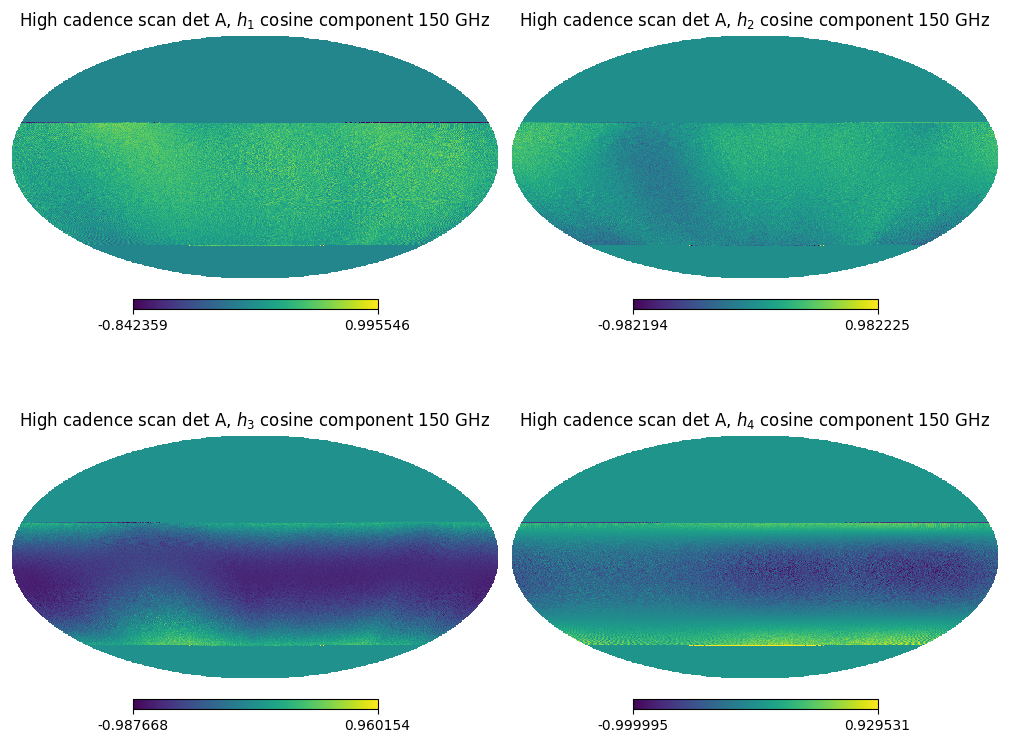

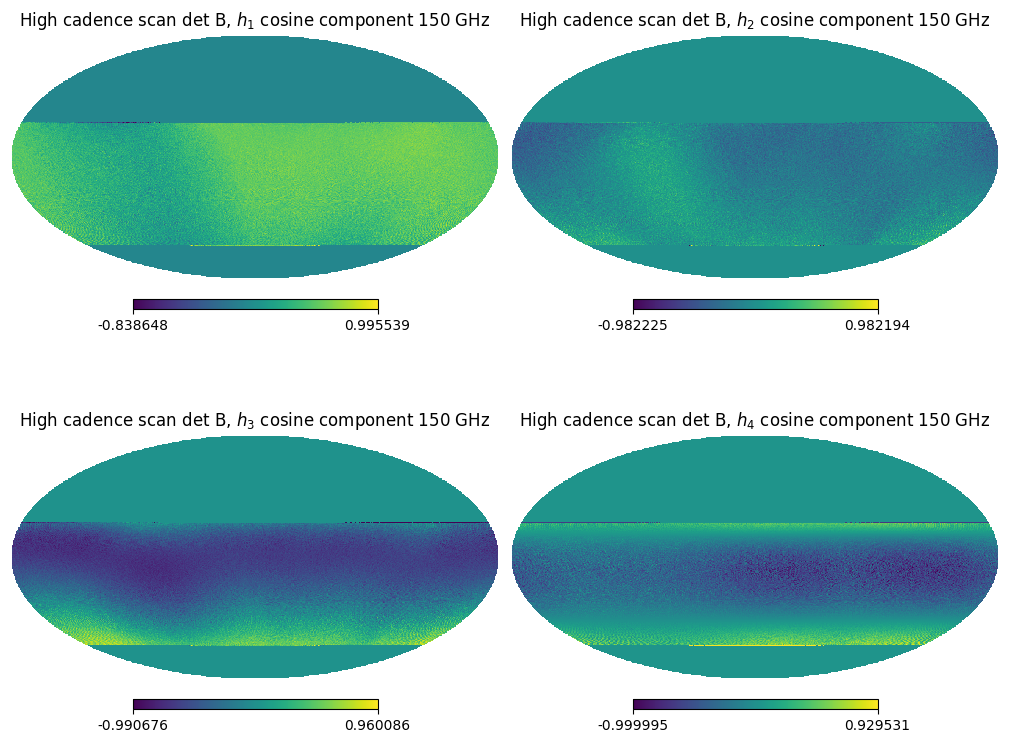

In [5]:
for det in ['A', 'B']:
    plt.figure(figsize=(10, 8))
    for i in range(1, 5):
        test_h_n = hp.read_map(path_h_n_maps + f'{name_file}_{det}_cos_{i}.fits', field=None)
        hp.mollview(test_h_n, sub=(2,2,i), title=f'High cadence scan det {det}, $h_{i}$ cosine component 150 GHz')
    plt.show()

If $A$ and $B$ are detectors within a pair, their crossing angle should be rotated by $\pi/2$, so we should have:
$$ \tilde{h}_n^B = \frac{1}{N_{\rm hits}} \sum_j e^{i n (\phi_j + \pi/2)} = \frac{1}{N_{\rm hits}} \sum_j e^{i n \phi_j} e^{ i n \pi/2}   $$ 
(of course here with a single detector $B$)

So, as we have access to the `cos` and `sin` component of the $h_n$ maps of both $A$ and $B$ detectors, and assuming $B$ detector is rotated wrt. $A$ with angle $\pi/2$, then:
$$\cos {n \phi_B } = \cos {n (\phi_A + \pi /2) } = \cos {n \phi_A} \cos{n \pi /2 } - \sin{n \phi_A} \sin{n \pi /2 } $$
$$\sin {n \phi_B } = \sin {n (\phi_A + \pi /2) } = \sin {n \phi_A} \cos{n \pi /2 } + \cos{n \phi_A} \sin{n \pi /2 }$$


Then we should be able to reconstruct the $h_n$ maps from one detector from the other, first for the cosine contribution


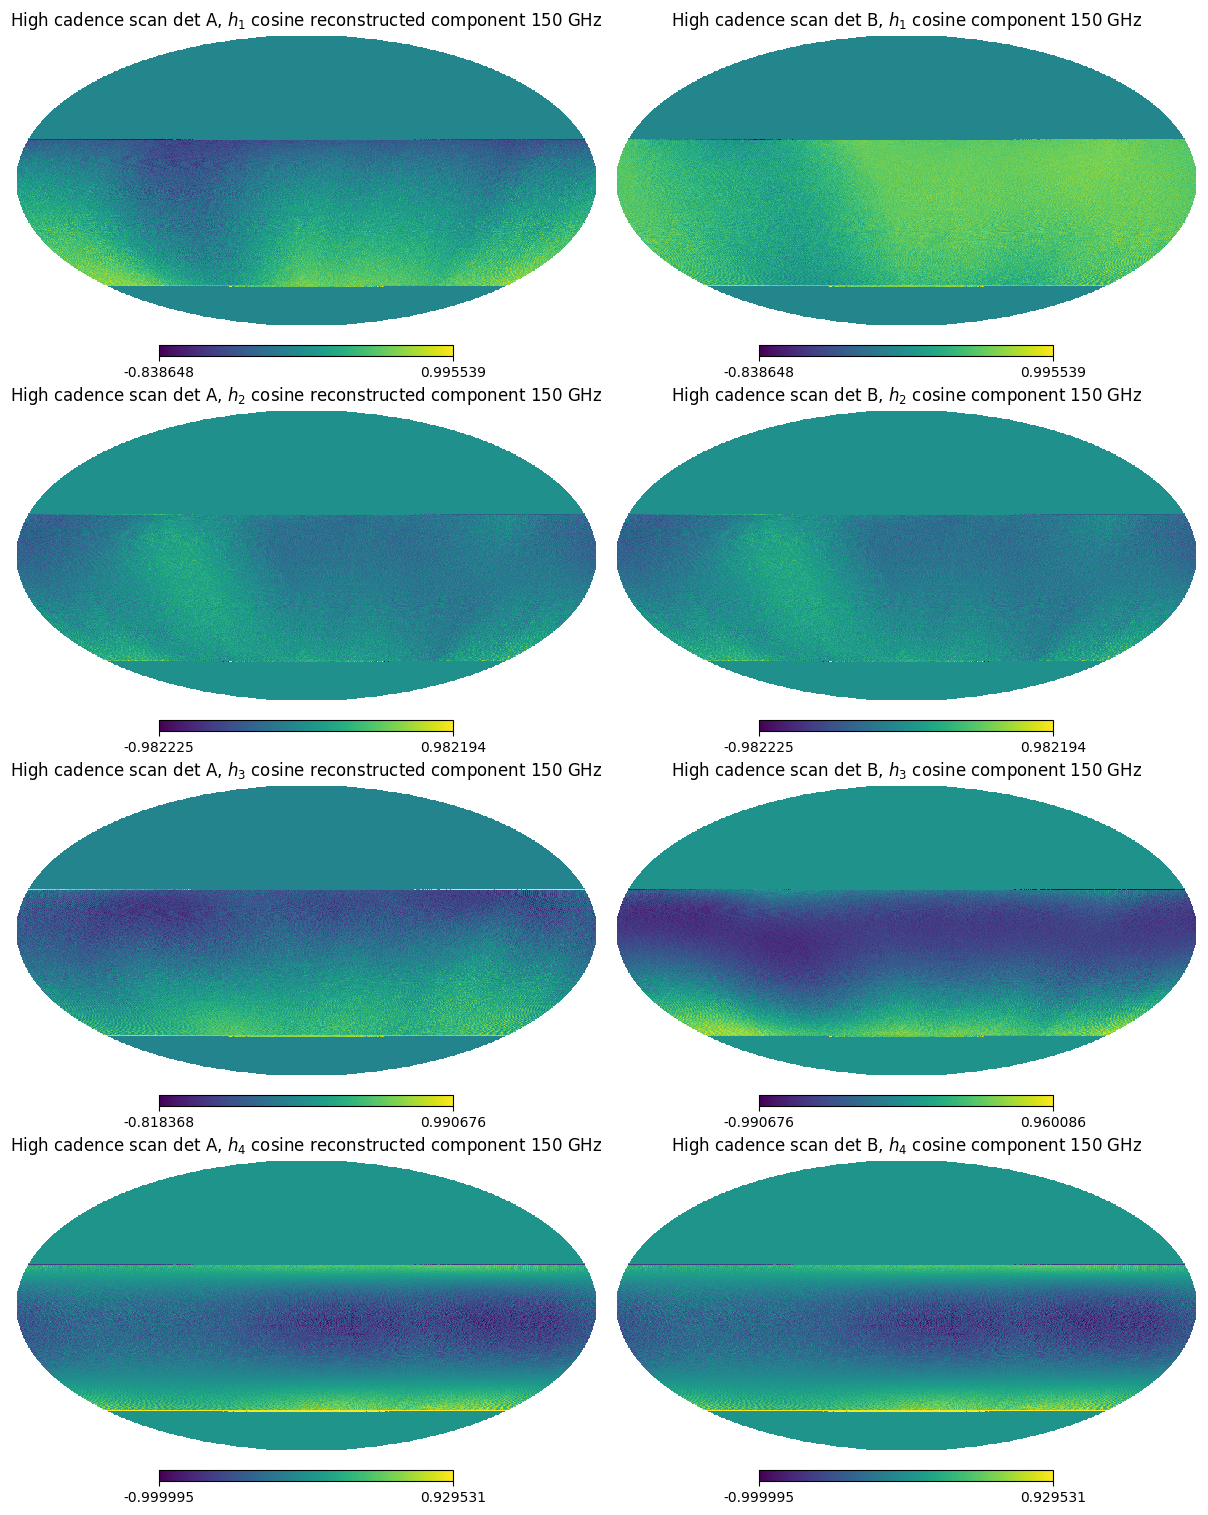

In [6]:
angle = np.pi/2

plt.figure(figsize=(12, 15))
for n in range(1, 5):
    det = 'A'
    file_h_n_A_cos = hp.read_map(path_h_n_maps + f'{name_file}_{det}_cos_{n}.fits', field=None)
    file_h_n_A_sin = hp.read_map(path_h_n_maps + f'{name_file}_{det}_sin_{n}.fits', field=None)    
    file_h_n_B_cos = hp.read_map(path_h_n_maps + f'{name_file}_B_cos_{n}.fits', field=None)

    rotated_h_n_from_A = file_h_n_A_cos * np.cos(n*angle) - file_h_n_A_sin * np.sin(n*angle) 
    
    hp.mollview(rotated_h_n_from_A, sub=(4,2,2*(n-1)+1), title=f'High cadence scan det {det}, $h_{n}$ cosine reconstructed component 150 GHz')
    hp.mollview(file_h_n_B_cos, sub=(4,2,2*(n-1)+2), title=f'High cadence scan det B, $h_{n}$ cosine component 150 GHz')
plt.show()

Then from the sine contribution

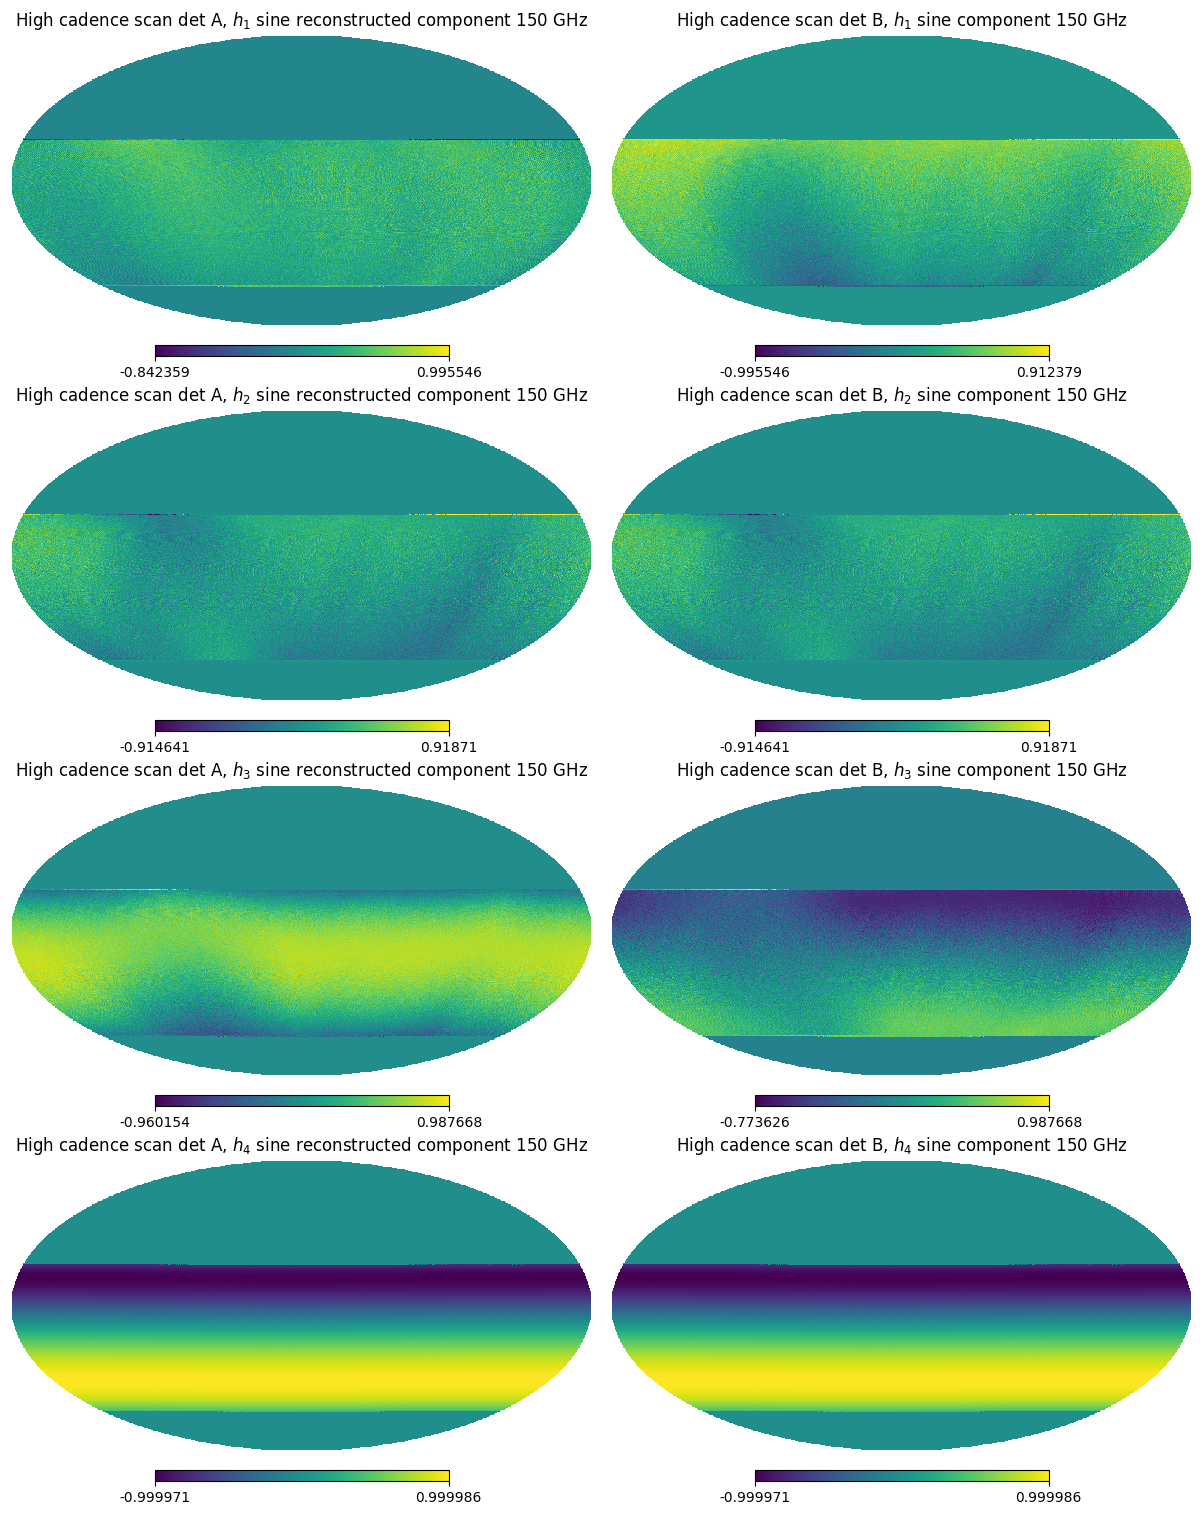

In [7]:
angle = np.pi/2

plt.figure(figsize=(12, 15))
for n in range(1, 5):
    det = 'A'
    file_h_n_A_cos = hp.read_map(path_h_n_maps + f'{name_file}_{det}_cos_{n}.fits', field=None)
    file_h_n_A_sin = hp.read_map(path_h_n_maps + f'{name_file}_{det}_sin_{n}.fits', field=None)    
    file_h_n_B_sin = hp.read_map(path_h_n_maps + f'{name_file}_B_sin_{n}.fits', field=None)

    rotated_h_n_from_A = file_h_n_A_sin*np.cos(n * angle) + file_h_n_A_cos * np.sin(n*angle) 
    
    hp.mollview(rotated_h_n_from_A, sub=(4,2,2*(n-1)+1), title=f'High cadence scan det {det}, $h_{n}$ sine reconstructed component 150 GHz')
    hp.mollview(file_h_n_B_sin, sub=(4,2,2*(n-1)+2), title=f'High cadence scan det B, $h_{n}$ sine component 150 GHz')
plt.show()

For sanity checks, we can look at the difference between the reconstructed maps and the original maps.

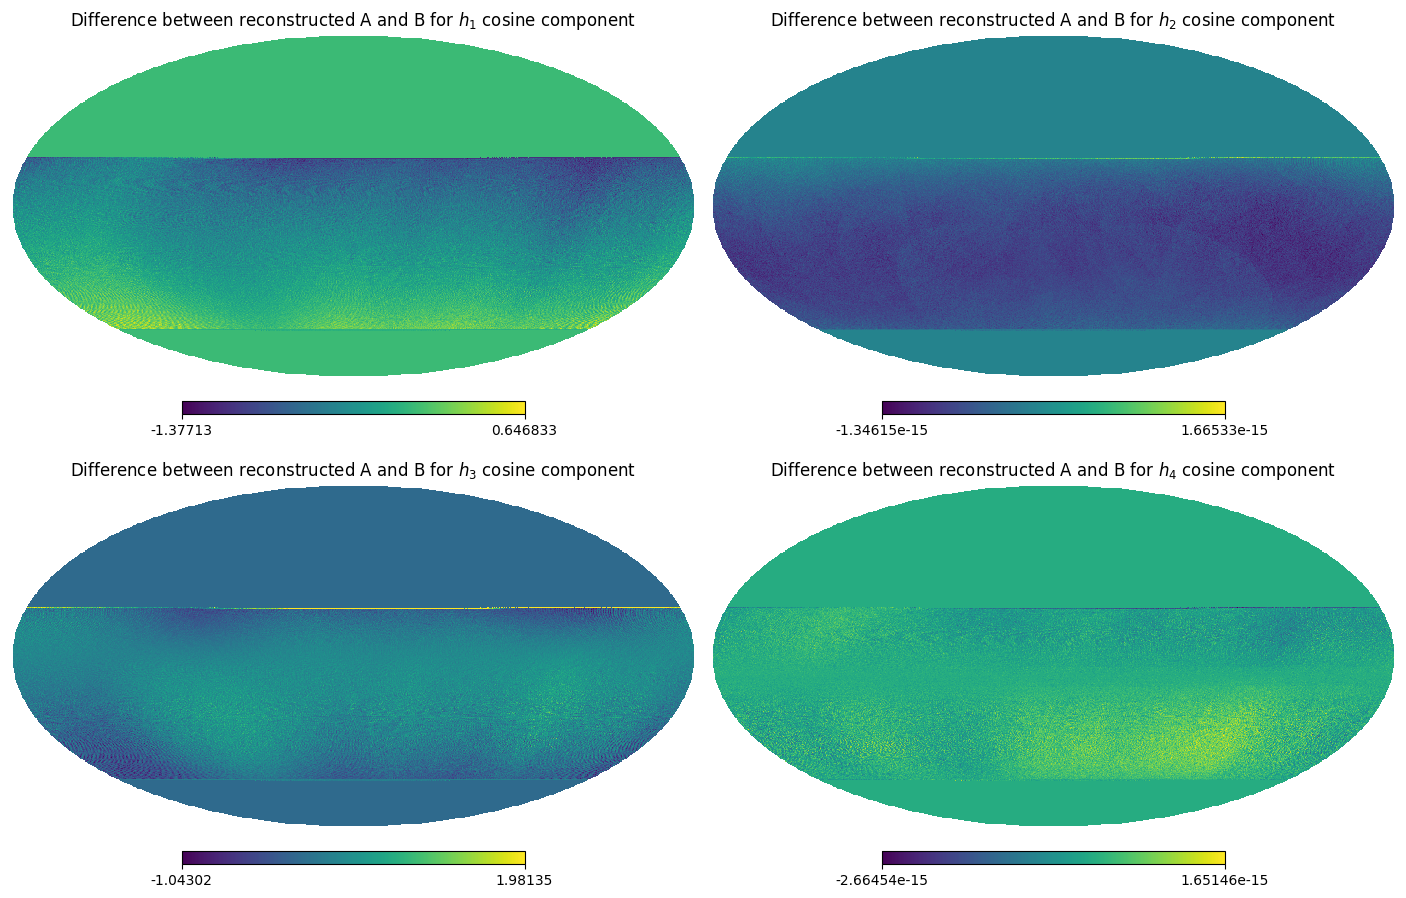

In [8]:
angle = np.pi/2

plt.figure(figsize=(14, 9))
for n in range(1, 5):
    det = 'A'
    file_h_n_A_cos = hp.read_map(path_h_n_maps + f'{name_file}_{det}_cos_{n}.fits', field=None)
    file_h_n_A_sin = hp.read_map(path_h_n_maps + f'{name_file}_{det}_sin_{n}.fits', field=None)    
    file_h_n_B_cos = hp.read_map(path_h_n_maps + f'{name_file}_B_cos_{n}.fits', field=None)

    rotated_h_n_from_A = file_h_n_A_cos * np.cos(n*angle) - file_h_n_A_sin * np.sin(n*angle) 
    
    hp.mollview(rotated_h_n_from_A-file_h_n_B_cos, sub=(2,2,n), title=f'Difference between reconstructed A and B for $h_{n}$ cosine component')
plt.show()

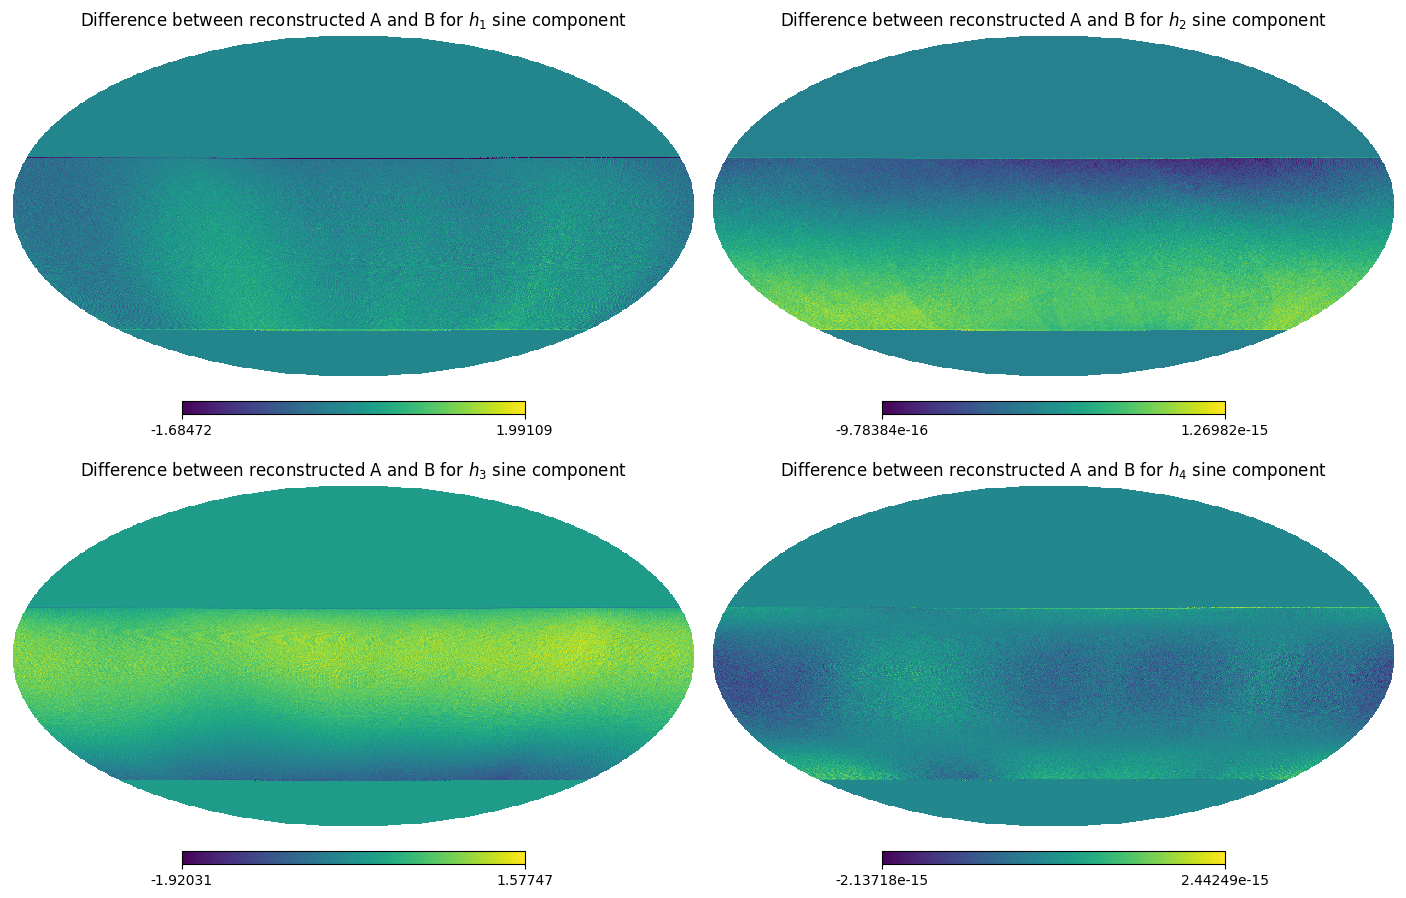

In [9]:
angle = np.pi/2

plt.figure(figsize=(14, 9))
for n in range(1, 5):
    det = 'A'
    file_h_n_A_cos = hp.read_map(path_h_n_maps + f'{name_file}_{det}_cos_{n}.fits', field=None)
    file_h_n_A_sin = hp.read_map(path_h_n_maps + f'{name_file}_{det}_sin_{n}.fits', field=None)    
    file_h_n_B_sin = hp.read_map(path_h_n_maps + f'{name_file}_B_sin_{n}.fits', field=None)

    rotated_h_n_from_A = file_h_n_A_sin*np.cos(n * angle) + file_h_n_A_cos * np.sin(n * angle) 
    
    hp.mollview(rotated_h_n_from_A-file_h_n_B_sin, sub=(2,2,n), title=f'Difference between reconstructed A and B for $h_{n}$ sine component')
plt.show()

It seems that only the even $h_n$ are well reconstructed by this rotation, while the uneven $h_n$ are not well reconstructed 

We can add a sanity test, verifying the maps of $|h_n|^2 = cos^2 + sin^2$

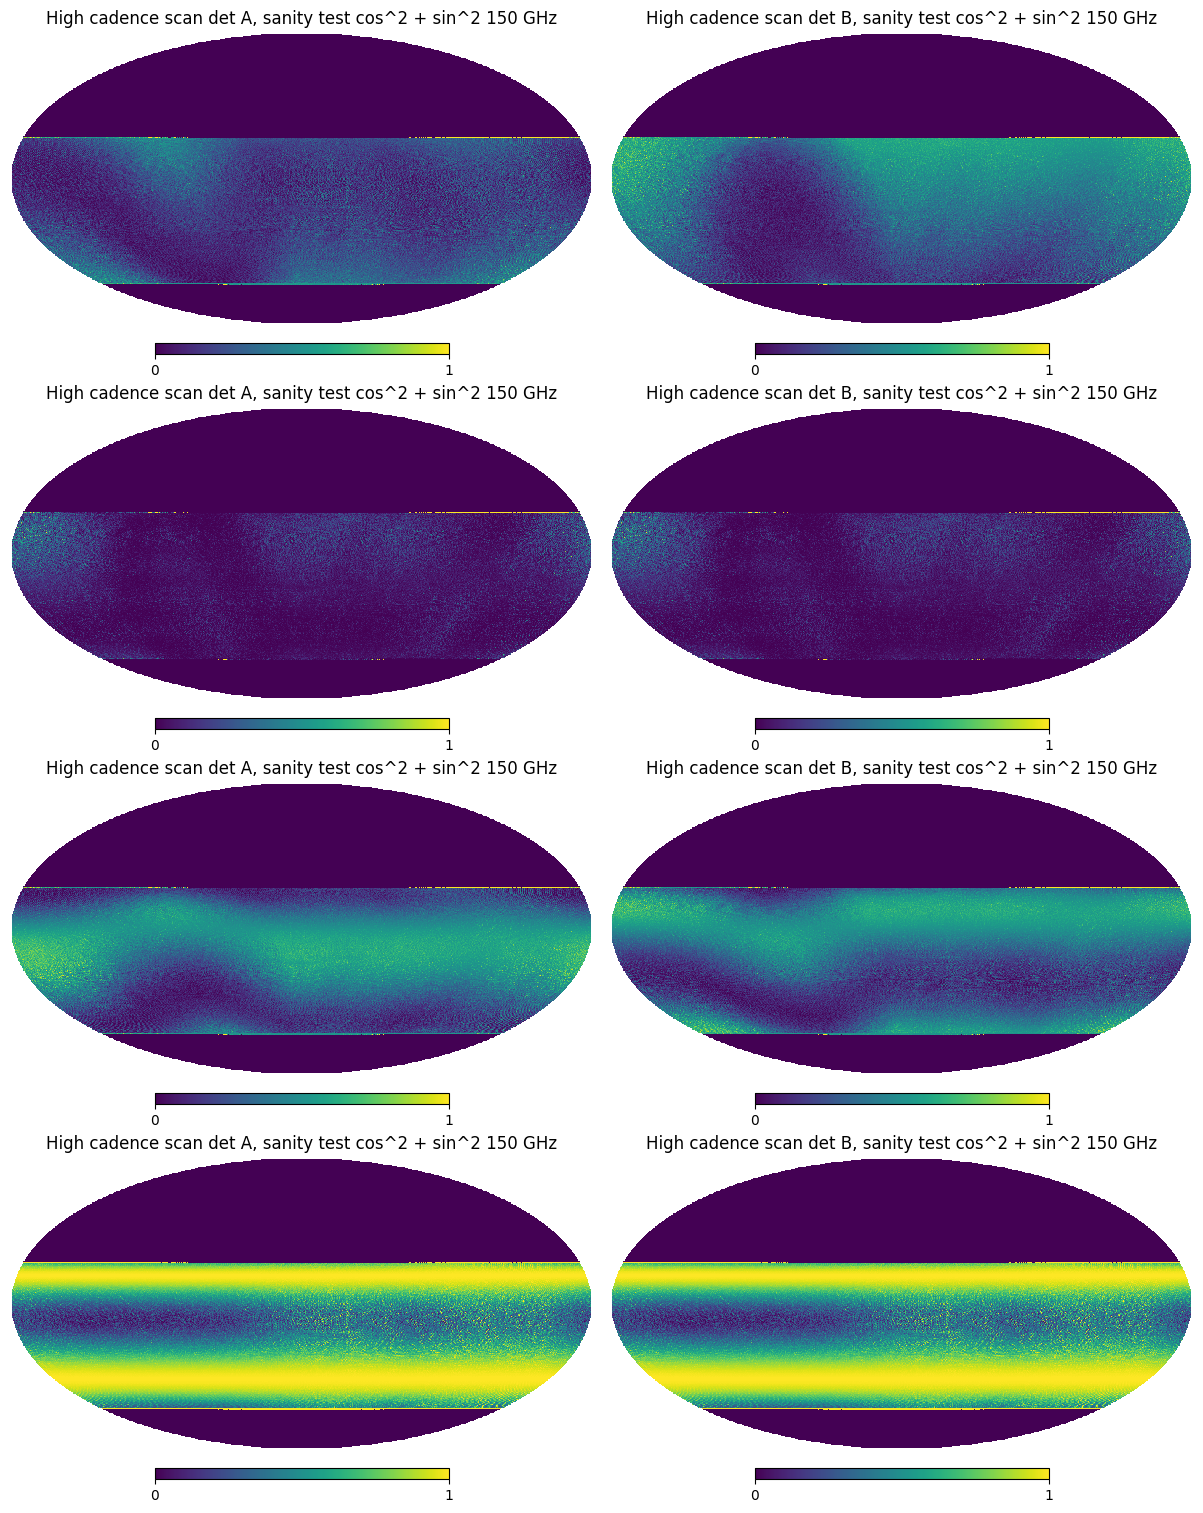

In [13]:
angle = np.pi/2

plt.figure(figsize=(12, 15))
for n in range(1, 5):
    det = 'A'
    file_h_n_A_cos = hp.read_map(path_h_n_maps + f'{name_file}_{det}_cos_{n}.fits', field=None)
    file_h_n_A_sin = hp.read_map(path_h_n_maps + f'{name_file}_{det}_sin_{n}.fits', field=None)    
    file_h_n_B_cos = hp.read_map(path_h_n_maps + f'{name_file}_B_cos_{n}.fits', field=None)
    file_h_n_B_sin = hp.read_map(path_h_n_maps + f'{name_file}_B_sin_{n}.fits', field=None)

    test_map_ones_A = file_h_n_A_cos**2 + file_h_n_A_sin**2
    test_map_ones_B = file_h_n_B_cos**2 + file_h_n_B_sin**2
    
    hp.mollview(test_map_ones_A, sub=(4,2,2*(n-1)+1), title=f'High cadence scan det {det}, sanity test cos^2 + sin^2 150 GHz')
    hp.mollview(test_map_ones_B, sub=(4,2,2*(n-1)+2), title=f'High cadence scan det B, sanity test cos^2 + sin^2 150 GHz')
plt.show()